# Korean Store Sales Prediction

## Sumitted by:
    Abhijeet Khandelwal
    Rakhi Singh
    Ekta Bauva
    Pragnya Hota
    Rahul Sharma
    Sneha Koudki

In [24]:
#loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,6
warnings.filterwarnings('ignore')

In [25]:
#importing dataset from the local directory
import os 
os.chdir('C:\\Users\\bhumi\\Desktop\\repo')
os.getcwd()

'C:\\Users\\bhumi\\Desktop\\repo'

In [26]:
dataset = pd.read_csv('Korea data.csv')

In [27]:
##################### Converting Date formate ############################
from datetime import datetime
#dataset['Date'] =  pd.to_datetime(dataset['Date'], format='%d%b%Y:%H:%M:%S.%f')
dataset['Date'] = pd.to_datetime(dataset['Date'])
#raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')
dataset.columns
#dataset['Date']

Index(['Code', 'Store Name', '# of Customers', '# of Items', 'Total Sales',
       'Discount', 'Avg Sales per Customer', 'Avg Sales per Item', 'Date',
       'Month', 'Year', 'Weekday', 'Distance from Station X(Meter)',
       'Distance from Station X(Feet)', 'Distance from Station Y(Meter)',
       'Distance from Station Y(Feet)', 'Distance from Main Street(Meter)',
       'Distance from Main Street(Feet)', 'YenWonRatio', 'Holiday',
       'ActualHighTemp', 'Outlook', 'Japanese Tourists'],
      dtype='object')

In [28]:
#describing the dataset using descriptive statistics
dataset.describe()

,Code,# of Customers,# of Items,Total Sales,Discount,Avg Sales per Customer,Avg Sales per Item,Month,Year,Distance from Station X(Meter),Distance from Station X(Feet),Distance from Station Y(Meter),Distance from Station Y(Feet),Distance from Main Street(Meter),Distance from Main Street(Feet),YenWonRatio,Holiday,ActualHighTemp,Japanese Tourists
count,2547.000000,2547.000000,2547.000000,2.547000e+03,2.547000e+03,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,1382.000000
mean,20229.850020,122.433059,1057.137417,9.757193e+06,2.504562e+05,76345.523753,8974.268159,6.893600,2011.907735,231.325874,758.810758,493.148803,1617.749117,310.342364,1018.120141,13.865611,0.083628,55.893208,3125.107815
std,180.914656,79.308370,740.138757,7.175019e+06,1.008142e+06,21035.668926,2631.240873,3.936863,0.615114,114.515005,375.650184,108.138841,354.914071,82.785058,271.339172,1.076320,0.276883,20.719264,1492.066625
min,20002.000000,3.000000,21.000000,4.990000e+04,-3.030400e+05,16633.000000,792.000000,1.000000,2011.000000,69.000000,226.000000,300.000000,984.000000,220.000000,722.000000,11.210000,0.000000,14.000000,841.000000
25%,20054.000000,62.500000,476.000000,3.867380e+06,0.000000e+00,62926.500000,7274.500000,3.000000,2012.000000,180.000000,591.000000,500.000000,1640.000000,230.000000,755.000000,13.460000,0.000000,37.000000,2261.500000
50%,20240.000000,120.000000,962.000000,8.999400e+06,0.000000e+00,76267.000000,9007.000000,8.000000,2012.000000,250.000000,820.000000,550.000000,1804.000000,314.000000,1030.000000,14.220000,0.000000,54.000000,2966.000000
75%,20288.000000,166.500000,1401.000000,1.340345e+07,6.900000e+03,89024.500000,10637.500000,10.000000,2012.000000,300.000000,984.000000,550.000000,1804.000000,400.000000,1312.000000,14.600000,0.000000,75.000000,3761.000000
max,20610.000000,430.000000,4664.000000,4.009030e+07,9.632940e+06,188690.000000,22876.000000,12.000000,2013.000000,400.000000,1312.000000,600.000000,1969.000000,400.000000,1312.000000,15.540000,1.000000,96.000000,18114.000000


In [29]:
#checking dataset datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 23 columns):
Code                                2547 non-null int64
Store Name                          2547 non-null object
# of Customers                      2547 non-null int64
# of Items                          2547 non-null int64
Total Sales                         2547 non-null int64
Discount                            2547 non-null int64
Avg Sales per Customer              2547 non-null int64
Avg Sales per Item                  2547 non-null int64
Date                                2547 non-null datetime64[ns]
Month                               2547 non-null int64
Year                                2547 non-null int64
Weekday                             2547 non-null object
Distance from Station X(Meter)      2547 non-null int64
Distance from Station X(Feet)       2547 non-null int64
Distance from Station Y(Meter)      2547 non-null int64
Distance from Station Y(Feet)       2547 n

In [30]:
#finding pearson correlation coefficient for each feature wrt to Total  Sales
data = dataset.corr()
data['Total Sales']


Code                                0.160017
# of Customers                      0.942229
# of Items                          0.915272
Total Sales                         1.000000
Discount                            0.210858
Avg Sales per Customer              0.474541
Avg Sales per Item                  0.432487
Month                               0.142766
Year                               -0.227211
Distance from Station X(Meter)      0.465492
Distance from Station X(Feet)       0.465654
Distance from Station Y(Meter)     -0.324201
Distance from Station Y(Feet)      -0.324724
Distance from Main Street(Meter)   -0.472208
Distance from Main Street(Feet)    -0.472158
YenWonRatio                         0.245086
Holiday                             0.047821
ActualHighTemp                      0.162821
Japanese Tourists                   0.204470
Name: Total Sales, dtype: float64

In [31]:
### to find null in the columns 
dataset.isnull().sum()



Code                                   0
Store Name                             0
# of Customers                         0
# of Items                             0
Total Sales                            0
Discount                               0
Avg Sales per Customer                 0
Avg Sales per Item                     0
Date                                   0
Month                                  0
Year                                   0
Weekday                                0
Distance from Station X(Meter)         0
Distance from Station X(Feet)          0
Distance from Station Y(Meter)         0
Distance from Station Y(Feet)          0
Distance from Main Street(Meter)       0
Distance from Main Street(Feet)        0
YenWonRatio                            0
Holiday                                0
ActualHighTemp                         0
Outlook                              355
Japanese Tourists                   1165
dtype: int64

In [32]:
#imputing Japanese Tourist missing values by median and Outlook by unkown 
dataset['Japanese Tourists'].fillna((dataset['Japanese Tourists'].median()),inplace=True)
dataset['Outlook'].fillna(('Unkown'),inplace=True)



In [33]:
import pandas as pd
from pandas import Series,DataFrame
#splitting the dataset shopwise.

StoreA_dataset=dataset[dataset['Store Name'] == 'Store A']
StoreB_dataset=dataset[dataset['Store Name'] == 'Store B']
StoreC_dataset=dataset[dataset['Store Name'] == 'Store C']
StoreD_dataset=dataset[dataset['Store Name'] == 'Store D']
StoreE_dataset=dataset[dataset['Store Name'] == 'Store E']

In [34]:
d = StoreA_dataset.corr()

d['Total Sales']


Code                               -0.422722
# of Customers                      0.848939
# of Items                          0.805877
Total Sales                         1.000000
Discount                            0.108611
Avg Sales per Customer              0.422827
Avg Sales per Item                  0.195357
Month                               0.216990
Year                               -0.530664
Distance from Station X(Meter)           NaN
Distance from Station X(Feet)            NaN
Distance from Station Y(Meter)           NaN
Distance from Station Y(Feet)            NaN
Distance from Main Street(Meter)         NaN
Distance from Main Street(Feet)          NaN
YenWonRatio                         0.591093
Holiday                             0.105624
ActualHighTemp                      0.325946
Japanese Tourists                   0.308102
Name: Total Sales, dtype: float64

In [35]:
# changing category cols into one hot encode

StoreA_dataset_weekday = pd.get_dummies(StoreA_dataset['Weekday'],prefix='week', prefix_sep='_')
StoreA_dataset_outlook = pd.get_dummies(StoreA_dataset['Outlook'],prefix='out', prefix_sep='_')
StoreB_dataset_weekday = pd.get_dummies(StoreB_dataset['Weekday'],prefix='week', prefix_sep='_')
StoreB_dataset_outlook = pd.get_dummies(StoreB_dataset['Outlook'],prefix='out', prefix_sep='_')
StoreC_dataset_weekday = pd.get_dummies(StoreC_dataset['Weekday'],prefix='week', prefix_sep='_')
StoreC_dataset_outlook = pd.get_dummies(StoreC_dataset['Outlook'],prefix='out', prefix_sep='_')
StoreD_dataset_weekday = pd.get_dummies(StoreD_dataset['Weekday'],prefix='week', prefix_sep='_')
StoreD_dataset_outlook = pd.get_dummies(StoreD_dataset['Outlook'],prefix='out', prefix_sep='_')
StoreE_dataset_weekday = pd.get_dummies(StoreE_dataset['Weekday'],prefix='week', prefix_sep='_')
StoreE_dataset_outlook = pd.get_dummies(StoreE_dataset['Outlook'],prefix='out', prefix_sep='_')



In [36]:
quant_col =['YenWonRatio','ActualHighTemp','Japanese Tourists','Year','Discount']


In [37]:
StoreA_dataset_quant = StoreA_dataset[quant_col]
StoreB_dataset_quant = StoreB_dataset[quant_col]
StoreC_dataset_quant = StoreC_dataset[quant_col]
StoreD_dataset_quant = StoreD_dataset[quant_col]
StoreE_dataset_quant = StoreE_dataset[quant_col]

#Set values in discount less then equal to zero to 0 and then adding one.

StoreA_dataset_quant.loc[StoreA_dataset_quant['Discount'] <=0,'Discount'] =1
StoreB_dataset_quant.loc[StoreB_dataset_quant['Discount'] <=0,'Discount'] =1
StoreC_dataset_quant.loc[StoreC_dataset_quant['Discount'] <=0,'Discount'] =1
StoreD_dataset_quant.loc[StoreD_dataset_quant['Discount'] <=0,'Discount'] =1
StoreE_dataset_quant.loc[StoreE_dataset_quant['Discount'] <=0,'Discount'] =1



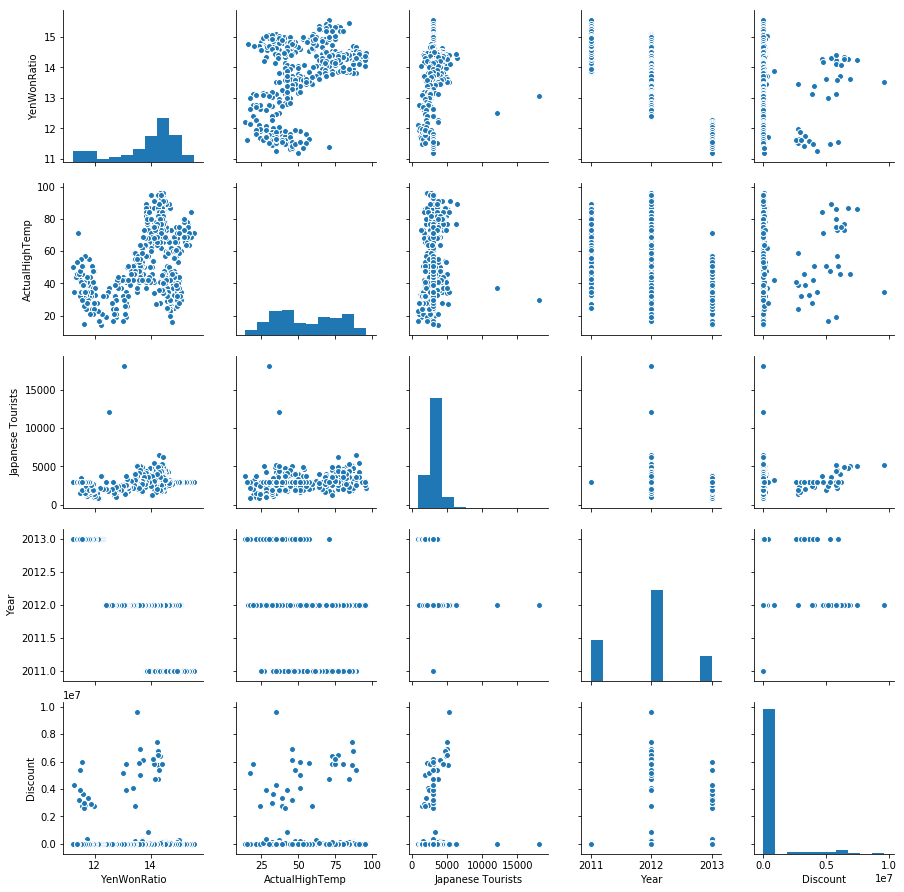

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#As per our assumption was every feature should be independent to each other, plotting graphs for sanity check.
#some columns are left skewd we have transformed those columns
g = sns.pairplot(StoreA_dataset_quant)

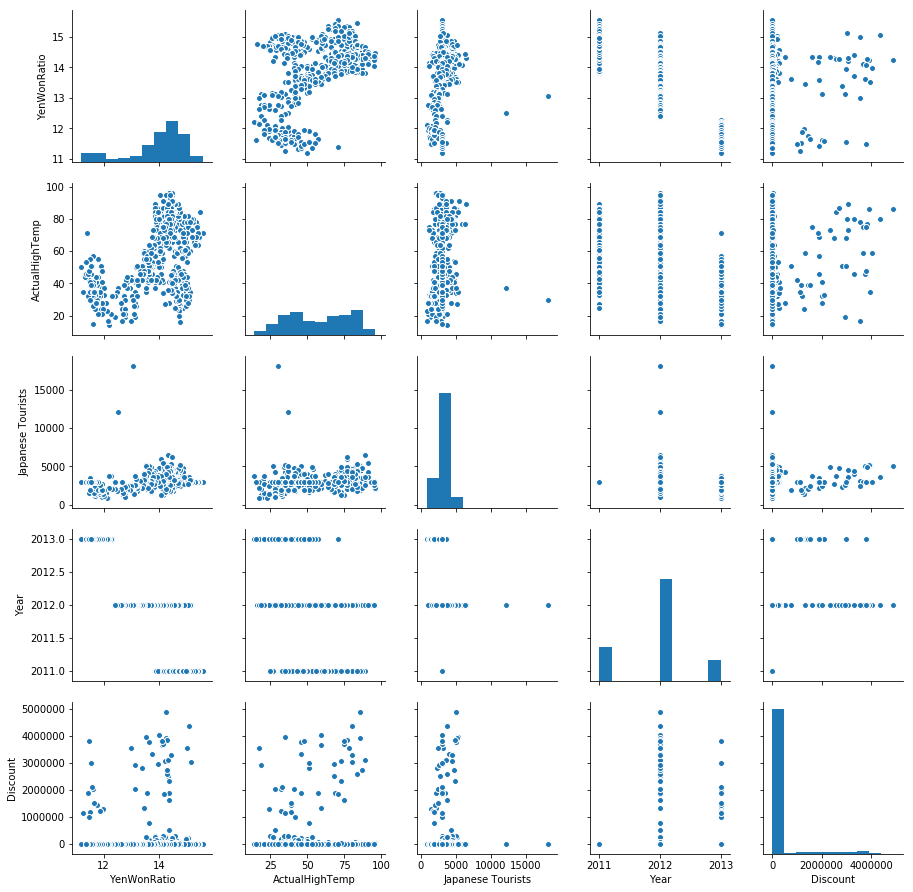

In [55]:
g = sns.pairplot(StoreB_dataset_quant)

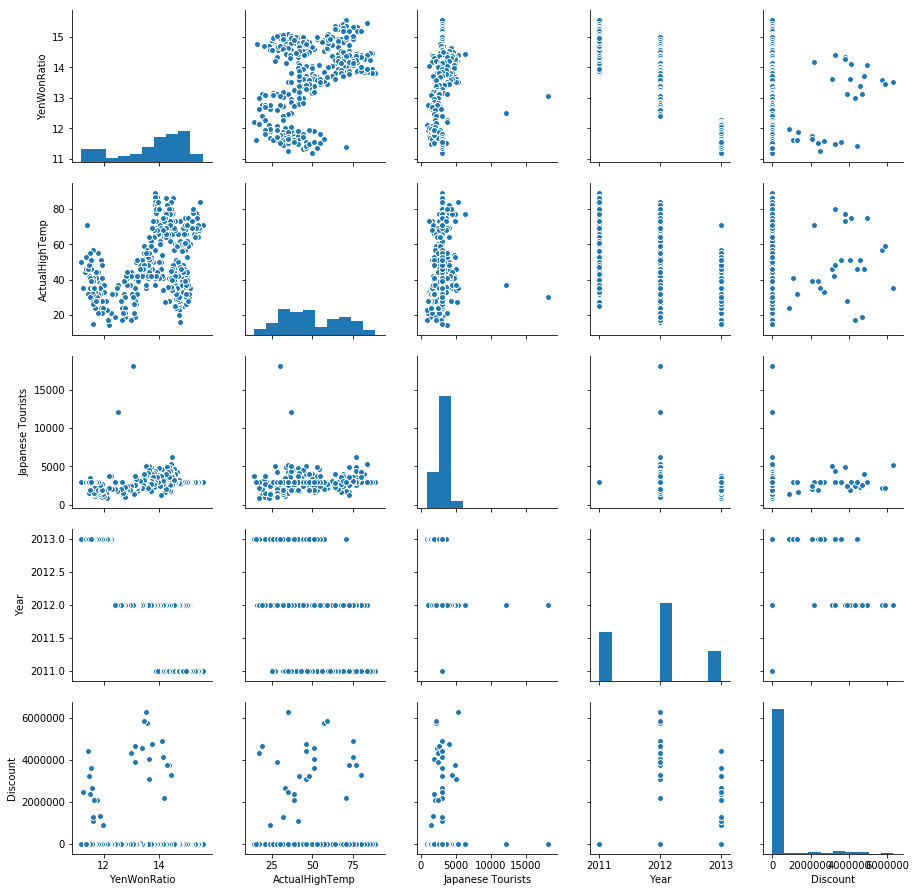

In [56]:
g = sns.pairplot(StoreC_dataset_quant)

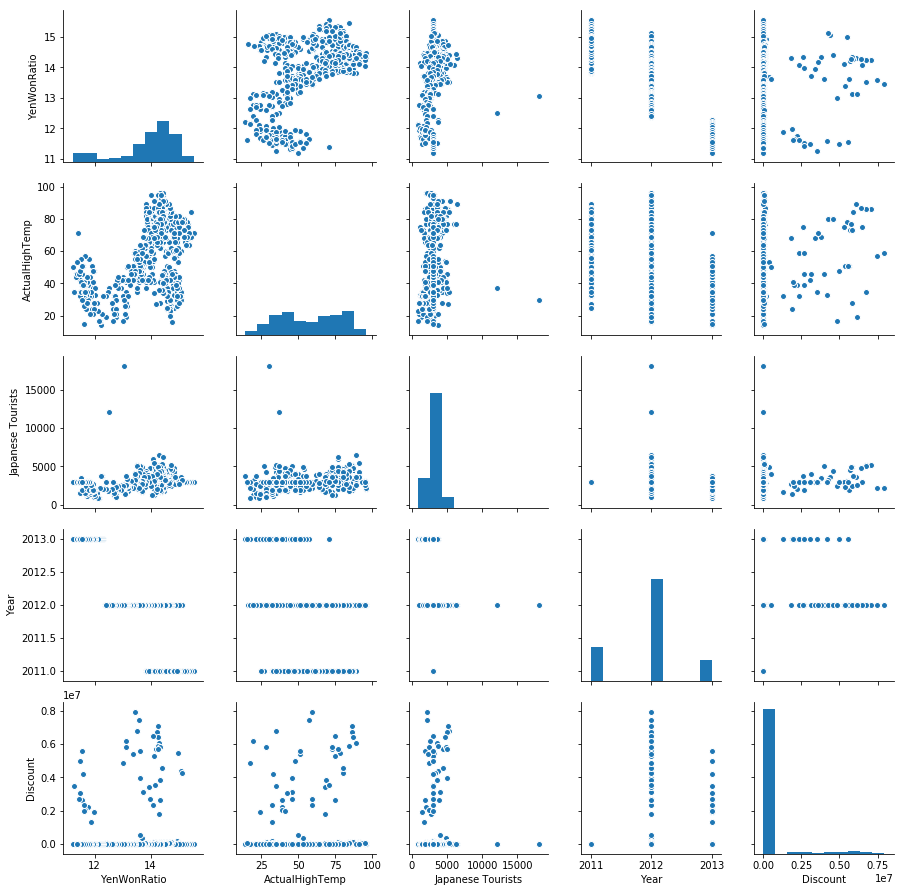

In [57]:
g = sns.pairplot(StoreD_dataset_quant)

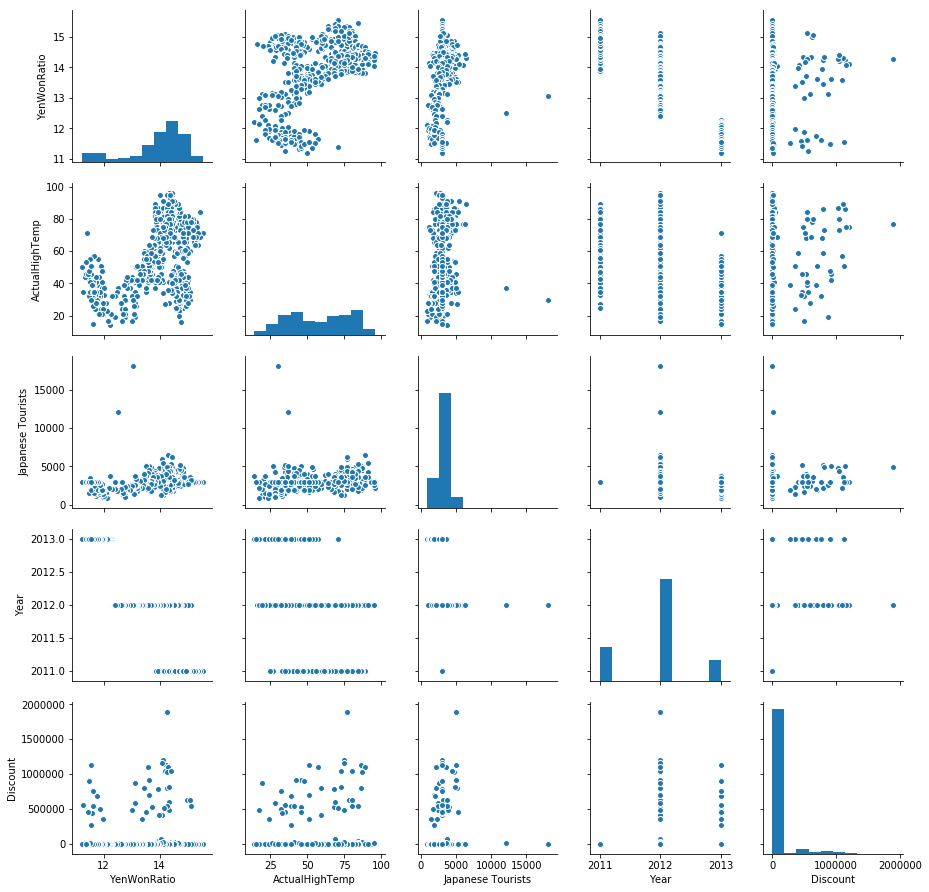

In [58]:
g = sns.pairplot(StoreE_dataset_quant)

In [39]:

#creating final dataset for each shop
store_a_new=pd.concat([StoreA_dataset_quant,StoreA_dataset_weekday,StoreA_dataset_outlook,StoreA_dataset['Holiday']], axis=1)

store_b_new=pd.concat([StoreB_dataset_quant,StoreB_dataset_weekday,StoreB_dataset_outlook,StoreB_dataset['Holiday']], axis=1)
store_c_new=pd.concat([StoreC_dataset_quant,StoreC_dataset_weekday,StoreC_dataset_outlook,StoreC_dataset['Holiday']], axis=1)
store_d_new=pd.concat([StoreD_dataset_quant,StoreD_dataset_weekday,StoreD_dataset_outlook,StoreD_dataset['Holiday']], axis=1)
store_e_new=pd.concat([StoreE_dataset_quant,StoreE_dataset_weekday,StoreE_dataset_outlook,StoreE_dataset['Holiday']], axis=1)


In [40]:
store_a_new.drop("Discount",axis=1,inplace=True)
store_a_new = pd.concat([store_a_new,np.log(StoreA_dataset_quant['Discount'])],axis=1)
store_b_new.drop("Discount",axis=1,inplace=True)
store_b_new = pd.concat([store_b_new,np.log(StoreB_dataset_quant['Discount'])],axis=1)
store_c_new.drop("Discount",axis=1,inplace=True)
store_c_new = pd.concat([store_c_new,np.log(StoreC_dataset_quant['Discount'])],axis=1)
store_d_new.drop("Discount",axis=1,inplace=True)
store_d_new = pd.concat([store_d_new,np.log(StoreD_dataset_quant['Discount'])],axis=1)
store_e_new.drop("Discount",axis=1,inplace=True)
store_e_new = pd.concat([store_e_new,np.log(StoreE_dataset_quant['Discount'])],axis=1)


In [41]:
#Developing models shop wise.
from sklearn.linear_model import LinearRegression
import pandas as pd  
from sklearn.cross_validation import train_test_split  


lin_reg_a = LinearRegression()
Y =  StoreA_dataset['Total Sales'].reshape(469,1)
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(store_a_new, Y,train_size=0.75,test_size=0.25) 

lin_reg_a.fit(X_train_a, y_train_a)

from sklearn.metrics import mean_squared_error

storeA_predictions = lin_reg_a.predict(X_test_a)
lin_mse = mean_squared_error(y_test_a, storeA_predictions)
lin_rmse = np.sqrt(lin_mse)
#print(lin_rmse)

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_a, y_train_a)
storeA_predictions = forest_reg.predict(X_test_a)
forest_mse = mean_squared_error(y_test_a, storeA_predictions)
forest_rmse = np.sqrt(forest_mse)
#print(forest_rmse)


from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train_a, y_train_a)
storeA_predictions = svm_reg.predict(X_test_a)
svm_mse = mean_squared_error(y_test_a, storeA_predictions)
svm_rmse = np.sqrt(svm_mse)
#print(svm_rmse)

print("Random Forest RMSE " + str(forest_rmse))
print("Support Vector Machine RMSE " + str(svm_rmse))
print("Linear Regression RMSE " + str(lin_rmse))



Random Forest RMSE 4473466.98159
Support Vector Machine RMSE 5371334.83126
Linear Regression RMSE 4576672.86741


Text(0,0.5,'Actual Values')

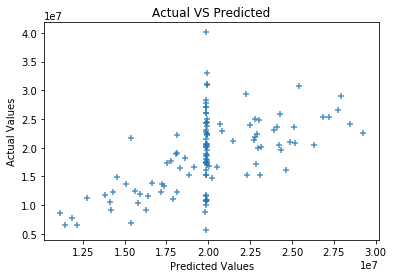

In [42]:
sns.regplot(storeA_predictions, y=y_test_a, marker="+", fit_reg=False)

# Set title
plt.title('Actual VS Predicted')

# Set x-axis label
plt.xlabel('Predicted Values')

# Set y-axis label
plt.ylabel('Actual Values')

In [43]:
#Summarizing linear regression model
import statsmodels.api as sm
X = sm.add_constant(X_train_a)
model = sm.OLS(y_train_a,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     21.87
Date:                Thu, 10 May 2018   Prob (F-statistic):           5.83e-46
Time:                        08:57:55   Log-Likelihood:                -5872.1
No. Observations:                 351   AIC:                         1.178e+04
Df Residuals:                     332   BIC:                         1.186e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.936e+09    1.1e+09      2.676      0.008    7.78e+08     5.1e+09
YenWonRatio        2.407e+06   4.02e+05      5.985      0.000    1.62e+06     3.2e+06
ActualHighTemp     7813.7470   1.47e+04      0.533      0.595    -2.1e+04    3.67e+04
Japanese Tourists   837.2118    206.946      4.046      0.000     430.121    1244.303
Year              -1.885e+06   6.99e+05     -2.695      0.007   -3.26e+06   -5.09e+05
week_Friday        4.195e+08   1.57e+08      2.675      0.008    1.11e+08    7.28e+08
week_Monday        4.198e+08   1.57e+08      2.678      0.008    1.11e+08    7.28e+08
week_Saturday      4.226e+08   1.57e+08      2.696      0.007    1.14e+08    7.31e+08
week_Sunday        4.237e+08   1.57e+08      2.703      0.007    1.15e+08    7.32e+08
week_Thursday      4.182e+08   1.57e+08      2.666      0.008     1.1e+08    7.27e+08
week_Tuesday       4.162e+08   1.57e+08      2.655      0.008    1.08e+08    7.25e+08
week_Wednesday     4.165e+08   1.57e+08      2.656      0.008    1.08e+08    7.25e+08
out_Cloudy         4.196e+08   1.57e+08      2.677      0.008    1.11e+08    7.28e+08
out_Rainy            4.2e+08   1.57e+08      2.679      0.008    1.12e+08    7.28e+08
out_Snowy          4.187e+08   1.57e+08      2.670      0.008     1.1e+08    7.27e+08
out_Sunny          4.186e+08   1.57e+08      2.670      0.008     1.1e+08    7.27e+08
out_Unkown         4.203e+08   1.57e+08      2.682      0.008    1.12e+08    7.29e+08
out_cloudy         4.197e+08   1.57e+08      2.677      0.008    1.11e+08    7.28e+08
out_rainy          4.196e+08   1.57e+08      2.675      0.008    1.11e+08    7.28e+08
Holiday           -2.752e+05   9.16e+05     -0.301      0.764   -2.08e+06    1.53e+06
Discount           8.144e+04    5.9e+04      1.381      0.168   -3.46e+04    1.97e+05
==============================================================================
Omnibus:                        7.708   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               10.210
Skew:                           0.179   Prob(JB):                      0.00607
Kurtosis:                       3.755   Cond. No.                     6.08e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
#linear regression

print("Linear Regression Parameters" + str(lin_reg_a.coef_))
#random forest features
print("Random Forest Parameters" + str(forest_reg.feature_importances_))
print(X_test_a.columns)

Linear Regression Parameters[[  2.40749233e+06   7.81374702e+03   8.37211774e+02  -1.88485853e+06
   -3.32906231e+04   3.35444747e+05   3.14239752e+06   4.16169167e+06
   -1.33568207e+06  -3.25347112e+06  -3.01709012e+06   1.03970999e+05
    4.88099725e+05  -8.14755596e+05  -8.98777302e+05   7.70410935e+05
    2.18337724e+05   1.32713516e+05  -2.75212573e+05   8.14402054e+04]]
Random Forest Parameters[ 0.41669411  0.13167439  0.17722538  0.02227301  0.00524088  0.00672196
  0.02787737  0.03883457  0.00873089  0.02492365  0.01484914  0.00671984
  0.01006404  0.0157141   0.01654736  0.00520994  0.00298246  0.00284618
  0.02279512  0.04207561]
Index(['YenWonRatio', 'ActualHighTemp', 'Japanese Tourists', 'Year',
       'week_Friday', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'out_Cloudy',
       'out_Rainy', 'out_Snowy', 'out_Sunny', 'out_Unkown', 'out_cloudy',
       'out_rainy', 'Holiday', 'Discount'],
      dtype='object')


In [45]:

lin_reg_B = LinearRegression()
Y =  StoreB_dataset['Total Sales'].reshape(563,1)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(store_b_new, Y,train_size=0.75,test_size=0.25) 


lin_reg_B.fit(X_train_b, y_train_b)

from sklearn.metrics import mean_squared_error

storeB_predictions = lin_reg_B.predict(X_test_b)
lin_mse = mean_squared_error(y_test_b, storeB_predictions)
lin_rmse = np.sqrt(lin_mse)
#print(lin_rmse)


forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_b, y_train_b)
storeB_predictions = forest_reg.predict(X_test_b)
forest_mse = mean_squared_error(y_test_b, storeB_predictions)
forest_rmse = np.sqrt(forest_mse)
#print(forest_rmse)

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train_b, y_train_b)
storeB_predictions = svm_reg.predict(X_test_b)
svm_mse = mean_squared_error(y_test_b, storeB_predictions)
svm_rmse = np.sqrt(svm_mse)
#print(svm_rmse)

print("Random Forest RMSE" + str(forest_rmse))
print("Support Vector Machine RMSE" + str(svm_rmse))
print("Linear Regression RMSE" + str(lin_rmse))


Random Forest RMSE2785894.66311
Support Vector Machine RMSE3277946.94706
Linear Regression RMSE2917482.91238


Text(0,0.5,'Actual Values')

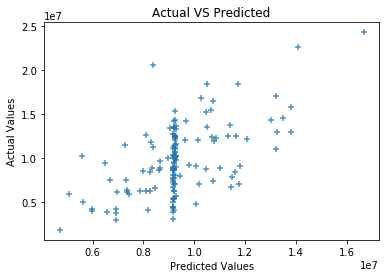

In [47]:
sns.regplot(storeB_predictions, y=y_test_b, marker="+", fit_reg=False)

# Set title
plt.title('Actual VS Predicted')

# Set x-axis label
plt.xlabel('Predicted Values')

# Set y-axis label
plt.ylabel('Actual Values')

In [48]:
import statsmodels.api as sm
X = sm.add_constant(X_train_b)
model = sm.OLS(y_train_b,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     16.38
Date:                Thu, 10 May 2018   Prob (F-statistic):           7.81e-38
Time:                        08:58:26   Log-Likelihood:                -6885.3
No. Observations:                 422   AIC:                         1.381e+04
Df Residuals:                     403   BIC:                         1.389e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.356e+09   6.75e+08      2.011      0.045    3.04e+07    2.68e+09
YenWonRatio        1.329e+06   2.51e+05      5.302      0.000    8.36e+05    1.82e+06
ActualHighTemp     2.802e+04   8795.406      3.186      0.002    1.07e+04    4.53e+04
Japanese Tourists   340.4473    135.408      2.514      0.012      74.252     606.642
Year              -8.728e+05    4.3e+05     -2.030      0.043   -1.72e+06   -2.77e+04
week_Friday         1.94e+08   9.64e+07      2.013      0.045    4.57e+06    3.83e+08
week_Monday        1.942e+08   9.64e+07      2.015      0.045    4.78e+06    3.84e+08
week_Saturday      1.948e+08   9.64e+07      2.022      0.044     5.4e+06    3.84e+08
week_Sunday        1.951e+08   9.63e+07      2.025      0.043    5.74e+06    3.84e+08
week_Thursday       1.93e+08   9.64e+07      2.003      0.046    3.54e+06    3.82e+08
week_Tuesday        1.93e+08   9.64e+07      2.002      0.046    3.49e+06    3.82e+08
week_Wednesday     1.924e+08   9.64e+07      1.996      0.047    2.86e+06    3.82e+08
out_Cloudy         1.939e+08   9.64e+07      2.012      0.045    4.47e+06    3.83e+08
out_Rainy          1.949e+08   9.64e+07      2.022      0.044     5.4e+06    3.84e+08
out_Snowy          1.933e+08   9.64e+07      2.006      0.046    3.84e+06    3.83e+08
out_Sunny          1.941e+08   9.64e+07      2.014      0.045    4.64e+06    3.84e+08
out_Unkown         1.934e+08   9.63e+07      2.009      0.045    4.12e+06    3.83e+08
out_cloudy          1.94e+08   9.64e+07      2.012      0.045    4.49e+06    3.83e+08
out_rainy           1.93e+08   9.64e+07      2.001      0.046     3.4e+06    3.83e+08
Holiday           -1144.7698    5.6e+05     -0.002      0.998    -1.1e+06     1.1e+06
Discount           5.878e+04   3.16e+04      1.858      0.064   -3421.392    1.21e+05
==============================================================================
Omnibus:                       42.510   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.324
Skew:                           0.624   Prob(JB):                     7.26e-17
Kurtosis:                       4.634   Cond. No.                     1.24e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.95e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
#random forest features
print("Linear Regression Parameters" + str(lin_reg_B.coef_))
#random forest features
print("Random Forest Parameters" + str(forest_reg.feature_importances_))

print(X_test_b.columns)

Linear Regression Parameters[[  1.32861921e+06   2.80224330e+04   3.40447313e+02  -8.72802533e+05
    2.02847572e+05   4.17608600e+05   1.04553453e+06   1.32629295e+06
   -7.64996187e+05  -8.05771241e+05  -1.42151622e+06   1.09660262e+05
    1.08342473e+06  -5.06264197e+05   3.34728436e+05  -3.98710556e+05
    2.01208238e+05  -8.24046914e+05  -1.14476982e+03   5.87760095e+04]]
Random Forest Parameters[  4.59396480e-01   1.37975656e-01   1.35828696e-01   2.30079912e-02
   8.88807512e-03   1.14885683e-02   2.60113330e-02   1.21912297e-02
   7.01220212e-03   1.08934788e-02   1.67219510e-02   1.04691641e-02
   1.49096334e-02   1.14367254e-02   1.10488194e-02   1.21733234e-02
   4.06544046e-04   8.00598918e-04   1.28942780e-02   7.64452522e-02]
Index(['YenWonRatio', 'ActualHighTemp', 'Japanese Tourists', 'Year',
       'week_Friday', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'out_Cloudy',
       'out_Rainy', 'out_Snowy', 'out_Su

In [52]:

lin_reg_C = LinearRegression()
Y =  StoreC_dataset['Total Sales'].reshape(393,1)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(store_c_new, Y,train_size=0.75,test_size=0.25) 


lin_reg_C.fit(X_train_c, y_train_c)

from sklearn.metrics import mean_squared_error

storeC_predictions = lin_reg_C.predict(X_test_c)
lin_mse = mean_squared_error(y_test_c, storeC_predictions)
lin_rmse = np.sqrt(lin_mse)
#print(lin_rmse)


forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_c, y_train_c)
storeC_predictions = forest_reg.predict(X_test_c)
forest_mse = mean_squared_error(y_test_c, storeC_predictions)
forest_rmse = np.sqrt(forest_mse)
#print(forest_rmse)

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train_c, y_train_c)
storeB_predictions = svm_reg.predict(X_test_c)
svm_mse = mean_squared_error(y_test_c, storeC_predictions)
svm_rmse = np.sqrt(svm_mse)
#print(svm_rmse)

print("Random Forest RMSE" + str(forest_rmse))
print("Support Vector Machine RMSE" + str(svm_rmse))
print("Linear Regression RMSE" + str(lin_rmse))


Random Forest RMSE2231895.21969
Support Vector Machine RMSE2231895.21969
Linear Regression RMSE2397125.39669


In [53]:
import statsmodels.api as sm
X = sm.add_constant(X_train_c)
model = sm.OLS(y_train_c,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     12.82
Date:                Thu, 10 May 2018   Prob (F-statistic):           3.04e-26
Time:                        09:02:26   Log-Likelihood:                -4742.4
No. Observations:                 294   AIC:                             9521.
Df Residuals:                     276   BIC:                             9587.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.797e+09    6.5e+08      5.839      0.000    2.52e+09    5.08e+09
YenWonRatio        2.327e+05   2.38e+05      0.978      0.329   -2.36e+05    7.01e+05
ActualHighTemp     5201.7797   1.01e+04      0.513      0.609   -1.48e+04    2.52e+04
Japanese Tourists   244.9374    119.405      2.051      0.041       9.878     479.997
Year               -2.47e+06   4.22e+05     -5.852      0.000    -3.3e+06   -1.64e+06
week_Friday        5.422e+08   9.29e+07      5.835      0.000    3.59e+08    7.25e+08
week_Monday        5.427e+08   9.29e+07      5.842      0.000     3.6e+08    7.26e+08
week_Saturday      5.429e+08   9.29e+07      5.844      0.000     3.6e+08    7.26e+08
week_Sunday        5.437e+08   9.29e+07      5.852      0.000    3.61e+08    7.27e+08
week_Thursday      5.417e+08   9.29e+07      5.832      0.000    3.59e+08    7.25e+08
week_Tuesday       5.419e+08   9.29e+07      5.832      0.000    3.59e+08    7.25e+08
week_Wednesday     5.418e+08   9.29e+07      5.832      0.000    3.59e+08    7.25e+08
out_Cloudy         6.321e+08   1.08e+08      5.832      0.000    4.19e+08    8.45e+08
out_Rainy          6.333e+08   1.08e+08      5.844      0.000     4.2e+08    8.47e+08
out_Snowy          6.327e+08   1.08e+08      5.836      0.000    4.19e+08    8.46e+08
out_Sunny          6.329e+08   1.08e+08      5.838      0.000    4.19e+08    8.46e+08
out_Unkown         6.333e+08   1.08e+08      5.844      0.000     4.2e+08    8.47e+08
out_cloudy         6.327e+08   1.08e+08      5.837      0.000    4.19e+08    8.46e+08
Holiday           -4.507e+05   5.63e+05     -0.800      0.424   -1.56e+06    6.58e+05
Discount           2.342e+05   3.64e+04      6.438      0.000    1.63e+05    3.06e+05
==============================================================================
Omnibus:                        5.424   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.986
Skew:                           0.197   Prob(JB):                       0.0501
Kurtosis:                       3.577   Cond. No.                     4.43e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0,0.5,'Actual Values')

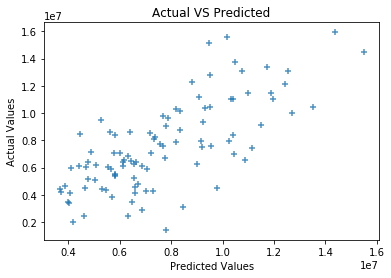

In [54]:
sns.regplot(storeC_predictions, y=y_test_c, marker="+", fit_reg=False)

# Set title
plt.title('Actual VS Predicted')

# Set x-axis label
plt.xlabel('Predicted Values')

# Set y-axis label
plt.ylabel('Actual Values')

In [55]:
#random forest features
print("Linear Regression Parameters" + str(lin_reg_C.coef_))
#random forest features
print("Random Forest Parameters" + str(forest_reg.feature_importances_))
print(X_test_c.columns)

Linear Regression Parameters[[  2.32727162e+05   5.20177968e+03   2.44937441e+02  -2.46983100e+06
   -2.39884220e+05   2.55836193e+05   5.02375367e+05   1.26791038e+06
   -6.92427751e+05  -5.05459014e+05  -5.88350956e+05  -7.59873916e+05
    4.91661359e+05  -1.46029447e+05   7.17809248e+04   5.18064472e+05
   -1.75603392e+05  -4.50653279e+05   2.34168653e+05]]
Random Forest Parameters[  2.86888709e-01   1.06838585e-01   1.63960948e-01   1.63112171e-01
   4.53625687e-03   1.12189007e-02   7.04020546e-03   2.00727418e-02
   1.51600786e-02   6.49661292e-03   6.98401274e-03   8.17106046e-03
   1.41071050e-02   6.80505892e-03   5.37250824e-03   7.32552296e-03
   2.01944698e-04   2.68197379e-03   1.63025604e-01]
Index(['YenWonRatio', 'ActualHighTemp', 'Japanese Tourists', 'Year',
       'week_Friday', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'out_Cloudy',
       'out_Rainy', 'out_Snowy', 'out_Sunny', 'out_Unkown', 'out_cloudy',


In [56]:

lin_reg_D = LinearRegression()
Y =  StoreD_dataset['Total Sales'].reshape(559,1)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(store_d_new, Y,train_size=0.75,test_size=0.25) 


lin_reg_D.fit(X_train_d, y_train_d)

from sklearn.metrics import mean_squared_error

storeD_predictions = lin_reg_D.predict(X_test_d)
lin_mse = mean_squared_error(y_test_d, storeD_predictions)
lin_rmse = np.sqrt(lin_mse)
#print(lin_rmse)


forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_d, y_train_d)
storeD_predictions = forest_reg.predict(X_test_d)
forest_mse = mean_squared_error(y_test_d, storeD_predictions)
forest_rmse = np.sqrt(forest_mse)
#print(forest_rmse)

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train_d, y_train_d)
storeD_predictions = svm_reg.predict(X_test_d)
svm_mse = mean_squared_error(y_test_d, storeD_predictions)
svm_rmse = np.sqrt(svm_mse)
#print(svm_rmse)

print("Random Forest RMSE" + str(forest_rmse))
print("Support Vector Machine RMSE" + str(svm_rmse))
print("Linear Regression RMSE" + str(lin_rmse))



Random Forest RMSE2669240.01651
Support Vector Machine RMSE5274679.96413
Linear Regression RMSE3325367.02136


In [57]:
import statsmodels.api as sm
X = sm.add_constant(X_train_d)
model = sm.OLS(y_train_d,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.83
Date:                Thu, 10 May 2018   Prob (F-statistic):           2.08e-52
Time:                        09:03:10   Log-Likelihood:                -6842.9
No. Observations:                 419   AIC:                         1.372e+04
Df Residuals:                     400   BIC:                         1.380e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               2.82e+09   7.24e+08      3.893      0.000     1.4e+09    4.24e+09
YenWonRatio        8.733e+05   2.65e+05      3.291      0.001    3.52e+05    1.39e+06
ActualHighTemp     8479.5258   9573.920      0.886      0.376   -1.03e+04    2.73e+04
Japanese Tourists  1227.7068    177.070      6.933      0.000     879.602    1575.812
Year              -1.805e+06   4.62e+05     -3.910      0.000   -2.71e+06   -8.98e+05
week_Friday        4.034e+08   1.03e+08      3.898      0.000       2e+08    6.07e+08
week_Monday        4.026e+08   1.03e+08      3.891      0.000    1.99e+08    6.06e+08
week_Saturday      4.054e+08   1.03e+08      3.918      0.000    2.02e+08    6.09e+08
week_Sunday         4.05e+08   1.03e+08      3.915      0.000    2.02e+08    6.08e+08
week_Thursday      4.015e+08   1.03e+08      3.880      0.000    1.98e+08    6.05e+08
week_Tuesday        4.01e+08   1.03e+08      3.875      0.000    1.98e+08    6.05e+08
week_Wednesday     4.012e+08   1.04e+08      3.876      0.000    1.98e+08    6.05e+08
out_Cloudy         4.025e+08   1.03e+08      3.890      0.000    1.99e+08    6.06e+08
out_Rainy          4.037e+08   1.03e+08      3.902      0.000       2e+08    6.07e+08
out_Snowy          4.024e+08   1.04e+08      3.886      0.000    1.99e+08    6.06e+08
out_Sunny           4.03e+08   1.03e+08      3.894      0.000       2e+08    6.06e+08
out_Unkown         4.025e+08   1.03e+08      3.892      0.000    1.99e+08    6.06e+08
out_cloudy          4.03e+08   1.03e+08      3.894      0.000       2e+08    6.06e+08
out_rainy          4.031e+08   1.04e+08      3.894      0.000       2e+08    6.07e+08
Holiday            1.105e+06   5.87e+05      1.883      0.060   -4.87e+04    2.26e+06
Discount           1.268e+05   3.41e+04      3.712      0.000    5.96e+04    1.94e+05
==============================================================================
Omnibus:                       15.623   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.528
Skew:                           0.318   Prob(JB):                     2.11e-05
Kurtosis:                       3.910   Cond. No.                     6.33e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0,0.5,'Actual Values')

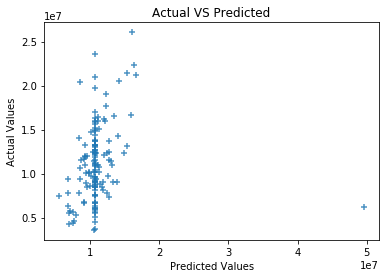

In [58]:
sns.regplot(storeD_predictions, y=y_test_d, marker="+", fit_reg=False)

# Set title
plt.title('Actual VS Predicted')

# Set x-axis label
plt.xlabel('Predicted Values')

# Set y-axis label
plt.ylabel('Actual Values')

In [59]:
print("Linear Regression Parameters" + str(lin_reg_D.coef_))
#random forest features
print("Random Forest Parameters" + str(forest_reg.feature_importances_))
#random forest features
print(X_test_d.columns)

Linear Regression Parameters[[  8.73275573e+05   8.47952575e+03   1.22770683e+03  -1.80511995e+06
    5.03457288e+05  -3.08450818e+05   2.55633652e+06   2.15113911e+06
   -1.37665564e+06  -1.83027843e+06  -1.69554803e+06  -3.98281436e+05
    7.93005365e+05  -4.84987566e+05   1.51941872e+05  -3.80911322e+05
    1.04953385e+05   2.14279702e+05   1.10516668e+06   1.26763644e+05]]
Random Forest Parameters[ 0.36509347  0.10167191  0.15292476  0.0153512   0.01471062  0.00722713
  0.07966548  0.04515356  0.00717892  0.00942785  0.01258403  0.00577784
  0.01838537  0.0032692   0.00968529  0.00469113  0.00814498  0.00727375
  0.02111806  0.11066544]
Index(['YenWonRatio', 'ActualHighTemp', 'Japanese Tourists', 'Year',
       'week_Friday', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'out_Cloudy',
       'out_Rainy', 'out_Snowy', 'out_Sunny', 'out_Unkown', 'out_cloudy',
       'out_rainy', 'Holiday', 'Discount'],
      dtype='object')


In [60]:
lin_reg_E = LinearRegression()
Y =  StoreE_dataset['Total Sales'].reshape(563,1)

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(store_e_new, Y,train_size=0.75,test_size=0.25) 


lin_reg_E.fit(X_train_e, y_train_e)

from sklearn.metrics import mean_squared_error

storeE_predictions = lin_reg_E.predict(X_test_e)
lin_mse = mean_squared_error(y_test_e, storeE_predictions)
lin_rmse = np.sqrt(lin_mse)
#print(lin_rmse)


forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_e, y_train_e)
storeE_predictions = forest_reg.predict(X_test_e)
forest_mse = mean_squared_error(y_test_e, storeE_predictions)
forest_rmse = np.sqrt(forest_mse)
#print(forest_rmse)

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train_e, y_train_e)
storeE_predictions = svm_reg.predict(X_test_e)
svm_mse = mean_squared_error(y_test_e, storeE_predictions)
svm_rmse = np.sqrt(svm_mse)
#print(svm_rmse)

print("Random Forest RMSE" + str(forest_rmse))
print("Support Vector Machine RMSE" + str(svm_rmse))
print("Linear Regression RMSE" + str(lin_rmse))



Random Forest RMSE693586.842246
Support Vector Machine RMSE769539.839873
Linear Regression RMSE688651.50053


In [61]:
import statsmodels.api as sm
X = sm.add_constant(X_train_e)
model = sm.OLS(y_train_e,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     8.444
Date:                Thu, 10 May 2018   Prob (F-statistic):           2.80e-19
Time:                        09:03:54   Log-Likelihood:                -6215.2
No. Observations:                 422   AIC:                         1.247e+04
Df Residuals:                     403   BIC:                         1.255e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.619e+08   1.33e+08     -2.715      0.007   -6.24e+08   -9.98e+07
YenWonRatio        7.322e+04   5.17e+04      1.416      0.157   -2.84e+04    1.75e+05
ActualHighTemp     4533.7902   1854.354      2.445      0.015     888.374    8179.206
Japanese Tourists    78.8065     29.592      2.663      0.008      20.633     136.980
Year               2.312e+05    8.5e+04      2.721      0.007    6.42e+04    3.98e+05
week_Friday       -5.159e+07    1.9e+07     -2.708      0.007    -8.9e+07   -1.41e+07
week_Monday       -5.162e+07    1.9e+07     -2.711      0.007   -8.91e+07   -1.42e+07
week_Saturday     -5.148e+07    1.9e+07     -2.703      0.007   -8.89e+07    -1.4e+07
week_Sunday       -5.163e+07    1.9e+07     -2.711      0.007   -8.91e+07   -1.42e+07
week_Thursday     -5.176e+07    1.9e+07     -2.717      0.007   -8.92e+07   -1.43e+07
week_Tuesday      -5.187e+07    1.9e+07     -2.723      0.007   -8.93e+07   -1.44e+07
week_Wednesday    -5.199e+07   1.91e+07     -2.729      0.007   -8.94e+07   -1.45e+07
out_Cloudy        -5.171e+07    1.9e+07     -2.716      0.007   -8.91e+07   -1.43e+07
out_Rainy         -5.156e+07    1.9e+07     -2.708      0.007    -8.9e+07   -1.41e+07
out_Snowy         -5.171e+07    1.9e+07     -2.715      0.007   -8.92e+07   -1.43e+07
out_Sunny          -5.16e+07   1.91e+07     -2.709      0.007   -8.91e+07   -1.41e+07
out_Unkown        -5.184e+07    1.9e+07     -2.724      0.007   -8.93e+07   -1.44e+07
out_cloudy        -5.178e+07   1.91e+07     -2.717      0.007   -8.92e+07   -1.43e+07
out_rainy         -5.175e+07   1.91e+07     -2.714      0.007   -8.92e+07   -1.43e+07
Holiday            2.208e+05   1.09e+05      2.031      0.043    7028.437    4.35e+05
Discount           4.412e+04   7793.692      5.661      0.000    2.88e+04    5.94e+04
==============================================================================
Omnibus:                       34.411   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.073
Skew:                           0.674   Prob(JB):                     7.31e-10
Kurtosis:                       3.760   Cond. No.                     4.57e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.86e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0,0.5,'Actual Values')

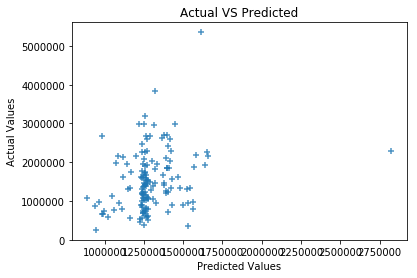

In [62]:
sns.regplot(storeE_predictions, y=y_test_e, marker="+", fit_reg=False)

# Set title
plt.title('Actual VS Predicted')

# Set x-axis label
plt.xlabel('Predicted Values')

# Set y-axis label
plt.ylabel('Actual Values')

In [63]:
#random forest features
print("Linear Regression Parameters" + str(lin_reg_E.coef_))
#random forest features
print("Random Forest Parameters" + str(forest_reg.feature_importances_))
print(X_test_e.columns)

Linear Regression Parameters[[  7.32205981e+04   4.53379019e+03   7.88064587e+01   2.31164239e+05
    1.18631202e+05   8.49441488e+04   2.23016063e+05   7.36868778e+04
   -5.36499167e+04  -1.60730594e+05  -2.85897780e+05  -2.88929047e+02
    1.47169238e+05   4.33069393e+02   1.05273379e+05  -1.35821063e+05
   -7.31924749e+04  -4.35732195e+04   2.20794136e+05   4.41207592e+04]]
Random Forest Parameters[ 0.15182627  0.1654719   0.22939285  0.04833543  0.01393154  0.01814716
  0.0204183   0.02475996  0.01155735  0.01020242  0.01785089  0.01197769
  0.01270626  0.0030427   0.01833753  0.00569957  0.00127416  0.01388316
  0.02438055  0.19680432]
Index(['YenWonRatio', 'ActualHighTemp', 'Japanese Tourists', 'Year',
       'week_Friday', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'out_Cloudy',
       'out_Rainy', 'out_Snowy', 'out_Sunny', 'out_Unkown', 'out_cloudy',
       'out_rainy', 'Holiday', 'Discount'],
      dtype='object')


In [64]:
#training full dataset and finding out accuracy
Store_dataset_weekday = pd.get_dummies(dataset['Weekday'],prefix='week', prefix_sep='_')
Store_dataset_outlook = pd.get_dummies(dataset['Outlook'],prefix='out', prefix_sep='_')
quant_col =['YenWonRatio','ActualHighTemp','Japanese Tourists','Year','Discount']
Store_dataset_quant = dataset[quant_col]
store_new=pd.concat([Store_dataset_quant,Store_dataset_weekday,Store_dataset_outlook,dataset['Holiday']], axis=1)
store_new.drop("Discount",axis=1,inplace=True)
dataset.loc[dataset['Discount'] <=0,'Discount'] =1

store_new = pd.concat([store_new,np.log(dataset['Discount'])],axis=1)


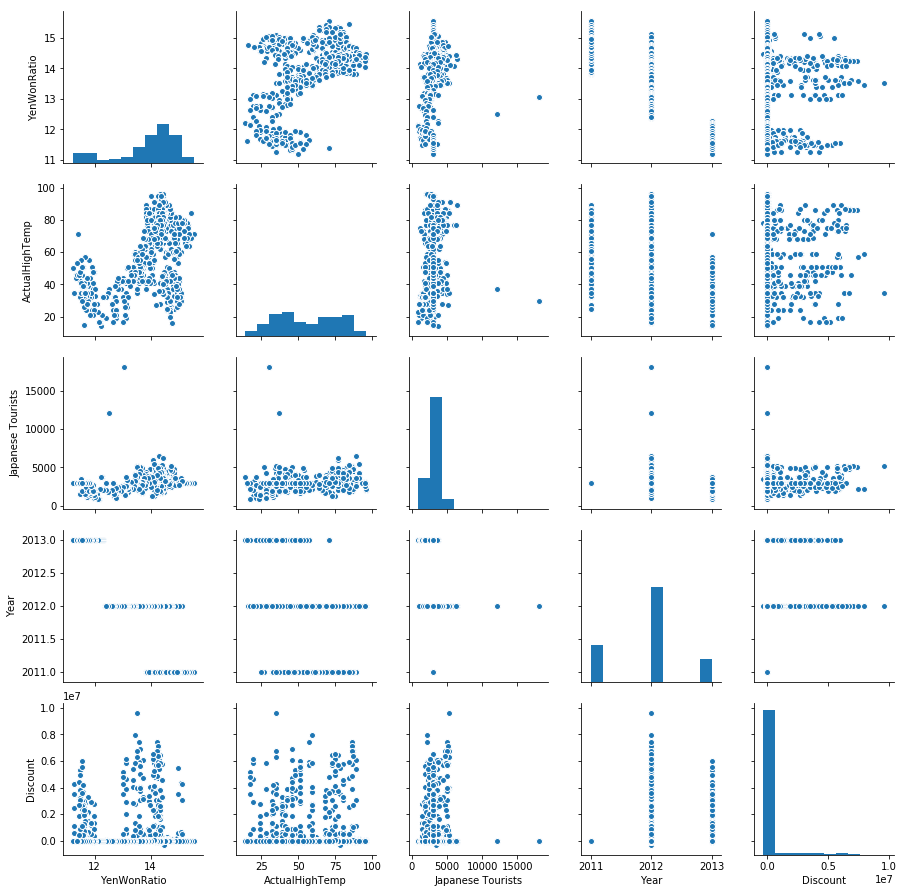

In [77]:
g = sns.pairplot(Store_dataset_quant)

In [78]:
dr = pd.concat([store_new,dataset['Total Sales']],axis=1)
p = dr.corr()
p['Total Sales']

YenWonRatio          0.245086
ActualHighTemp       0.162821
Japanese Tourists    0.145569
Year                -0.227211
week_Friday          0.011321
week_Monday         -0.002771
week_Saturday        0.106167
week_Sunday          0.104887
week_Thursday       -0.062704
week_Tuesday        -0.079826
week_Wednesday      -0.077283
out_Cloudy          -0.016298
out_Rainy            0.035724
out_Snowy           -0.078229
out_Sunny           -0.032432
out_Unkown           0.080282
out_cloudy          -0.034993
out_rainy            0.048581
Holiday              0.047821
Discount             0.157046
Total Sales          1.000000
Name: Total Sales, dtype: float64

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
Y =  dataset['Total Sales']
X_train, X_test, y_train, y_test = train_test_split(store_new, Y,train_size=0.75,test_size=0.25) 

lin_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

store_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, store_predictions)
lin_rmse = np.sqrt(lin_mse)
#print(lin_rmse)

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
store_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, store_predictions)
forest_rmse = np.sqrt(forest_mse)
#print(forest_rmse)


from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
store_predictions = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, store_predictions)
svm_rmse = np.sqrt(svm_mse)
#print(svm_rmse)


print("Random Forest RMSE" + str(forest_rmse))
print("Support Vector Machine RMSE" + str(svm_rmse))
print("Linear Regression RMSE" + str(lin_rmse))


Random Forest RMSE7607655.80904
Support Vector Machine RMSE6931305.92979
Linear Regression RMSE6413683.92311


In [66]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Sales   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     17.42
Date:                Thu, 10 May 2018   Prob (F-statistic):           2.96e-51
Time:                        09:04:24   Log-Likelihood:                -32729.
No. Observations:                1910   AIC:                         6.550e+04
Df Residuals:                    1891   BIC:                         6.560e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.347e+09    6.7e+08      4.998      0.000    2.03e+09    4.66e+09
YenWonRatio        8.249e+05   2.54e+05      3.244      0.001    3.26e+05    1.32e+06
ActualHighTemp    -2177.4657   9342.234     -0.233      0.816   -2.05e+04    1.61e+04
Japanese Tourists   425.2519    145.934      2.914      0.004     139.043     711.461
Year              -2.141e+06   4.27e+05     -5.017      0.000   -2.98e+06    -1.3e+06
week_Friday        4.781e+08   9.57e+07      4.998      0.000     2.9e+08    6.66e+08
week_Monday        4.779e+08   9.56e+07      4.997      0.000     2.9e+08    6.65e+08
week_Saturday      4.795e+08   9.57e+07      5.013      0.000    2.92e+08    6.67e+08
week_Sunday        4.794e+08   9.56e+07      5.013      0.000    2.92e+08    6.67e+08
week_Thursday      4.774e+08   9.57e+07      4.989      0.000     2.9e+08    6.65e+08
week_Tuesday       4.771e+08   9.57e+07      4.986      0.000    2.89e+08    6.65e+08
week_Wednesday     4.773e+08   9.57e+07      4.988      0.000     2.9e+08    6.65e+08
out_Cloudy         4.779e+08   9.56e+07      4.997      0.000     2.9e+08    6.65e+08
out_Rainy          4.787e+08   9.56e+07      5.005      0.000    2.91e+08    6.66e+08
out_Snowy          4.779e+08   9.57e+07      4.995      0.000     2.9e+08    6.65e+08
out_Sunny          4.779e+08   9.57e+07      4.995      0.000     2.9e+08    6.66e+08
out_Unkown         4.784e+08   9.56e+07      5.004      0.000    2.91e+08    6.66e+08
out_cloudy         4.775e+08   9.57e+07      4.989      0.000     2.9e+08    6.65e+08
out_rainy          4.785e+08   9.57e+07      4.998      0.000    2.91e+08    6.66e+08
Holiday            1.056e+06   5.93e+05      1.782      0.075   -1.06e+05    2.22e+06
Discount           3.176e+05   3.37e+04      9.412      0.000    2.51e+05    3.84e+05
==============================================================================
Omnibus:                      111.318   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.600
Skew:                           0.598   Prob(JB):                     2.65e-29
Kurtosis:                       3.471   Cond. No.                     4.69e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.24e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
print(lin_reg.coef_)
print(forest_reg.feature_importances_)
print(X_test.columns)

[  8.24884487e+05  -2.17746567e+03   4.25251877e+02  -2.14077413e+06
  -1.64621259e+04  -1.97843222e+05   1.41320643e+06   1.32347579e+06
  -7.12904964e+05  -1.01143099e+06  -7.98040923e+05  -1.97622974e+05
   5.60347920e+05  -2.27591360e+05  -2.04925088e+05   3.40613910e+05
  -6.48194312e+05   3.77371904e+05   1.05589691e+06   3.17559162e+05]
[ 0.2305462   0.13206574  0.11059257  0.03310091  0.0157056   0.01152103
  0.02570599  0.02933125  0.01323895  0.01336218  0.01397691  0.01523466
  0.01743282  0.00763714  0.01596139  0.01088106  0.00157663  0.00376712
  0.02381863  0.27454324]
Index(['YenWonRatio', 'ActualHighTemp', 'Japanese Tourists', 'Year',
       'week_Friday', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'out_Cloudy',
       'out_Rainy', 'out_Snowy', 'out_Sunny', 'out_Unkown', 'out_cloudy',
       'out_rainy', 'Holiday', 'Discount'],
      dtype='object')


Text(0,0.5,'Actual Values')

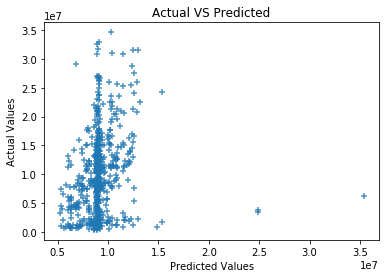

In [68]:
sns.regplot(store_predictions, y=y_test, marker="+", fit_reg=False)

# Set title
plt.title('Actual VS Predicted')

# Set x-axis label
plt.xlabel('Predicted Values')

# Set y-axis label
plt.ylabel('Actual Values')